<a href="https://colab.research.google.com/github/tariq698/health/blob/main/E_Commrace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default = 'plotly_white'

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv('/content/sales-data-sample.csv')

In [ ]:
df.head()

,OrderDate,Category,Discount,OrderID,Profit,Quantity,Region,Sales,Segment,ShipDate,...,State,Sub_Category,DaystoShipActual,SalesForecast,ShipStatus,DaystoShipScheduled,SalesperCustomer,ProfitRatio,latitude,longitude
0,2011-01-04T00:00:00.000Z,Office Supplies,0.2,CA-2011-103800,6,2,Central,16,Consumer,2011-01-08T00:00:00.000Z,...,Texas,Paper,4,22,Shipped Early,6,16.45,33.8,29.8941,-95.6481
1,2011-01-05T00:00:00.000Z,Office Supplies,0.2,CA-2011-112326,4,3,Central,12,Home Office,2011-01-09T00:00:00.000Z,...,Illinois,Labels,4,15,Shipped Early,6,11.78,36.3,41.7662,-88.1410
2,2011-01-05T00:00:00.000Z,Office Supplies,0.8,CA-2011-112326,-5,2,Central,4,Home Office,2011-01-09T00:00:00.000Z,...,Illinois,Binders,4,5,Shipped Early,6,3.54,-155.0,41.7662,-88.1410
3,2011-01-05T00:00:00.000Z,Office Supplies,0.2,CA-2011-112326,-65,3,Central,273,Home Office,2011-01-09T00:00:00.000Z,...,Illinois,Storage,4,357,Shipped Early,6,272.74,-23.8,41.7662,-88.1410
4,2011-01-06T00:00:00.000Z,Office Supplies,0.2,CA-2011-141817,5,3,East,20,Consumer,2011-01-13T00:00:00.000Z,...,Pennsylvania,Art,7,26,Shipped Late,6,19.54,25.0,39.9448,-75.2288


In [ ]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['ShipDate'] = pd.to_datetime(df['ShipDate'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   OrderDate            9994 non-null   datetime64[ns, UTC]
 1   Category             9994 non-null   object             
 2   Discount             9994 non-null   float64            
 3   OrderID              9994 non-null   object             
 4   Profit               9994 non-null   int64              
 5   Quantity             9994 non-null   int64              
 6   Region               9994 non-null   object             
 7   Sales                9994 non-null   int64              
 8   Segment              9994 non-null   object             
 9   ShipDate             9994 non-null   datetime64[ns, UTC]
 10  ShipMode             9994 non-null   object             
 11  State                9994 non-null   object             
 12  Sub_Category        

In [ ]:
df.isnull().sum()

,0
OrderDate,0
Category,0
Discount,0
OrderID,0
Profit,0
Quantity,0
Region,0
Sales,0
Segment,0
ShipDate,0


In [ ]:
df['SalesperCustomer'] = df['SalesperCustomer'].fillna((df['SalesperCustomer'].mean()))
df['ProfitRatio'] = df['ProfitRatio'].fillna((df['ProfitRatio'].mean()))

In [ ]:
df.isnull().sum()

,0
OrderDate,0
Category,0
Discount,0
OrderID,0
Profit,0
Quantity,0
Region,0
Sales,0
Segment,0
ShipDate,0


In [ ]:
df['order_month'] = df['OrderDate'].dt.month
df['order_year'] = df['OrderDate'].dt.year
df['order_week'] = df['OrderDate'].dt.dayofweek

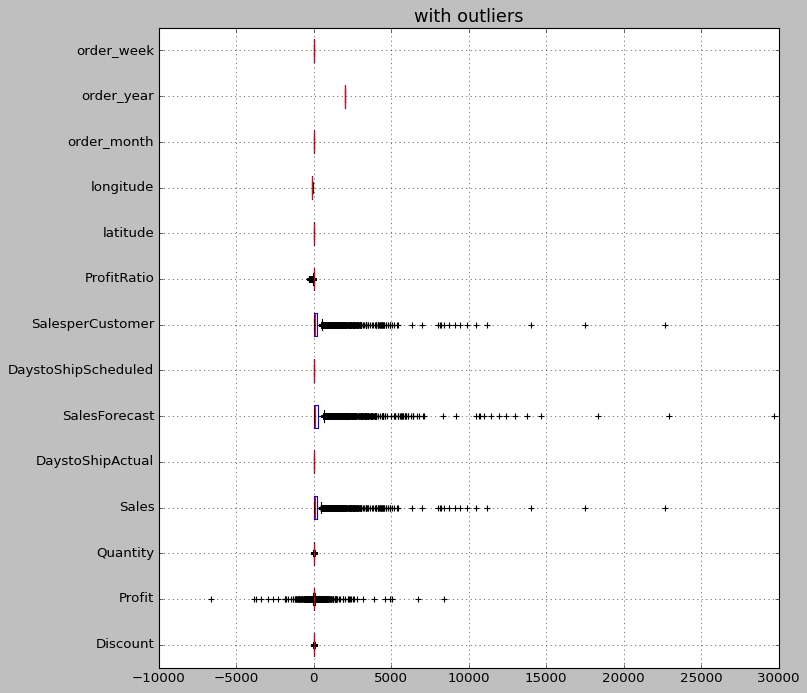

In [ ]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('with outliers',fontsize=16)
plt.show()

In [ ]:
def remove_outliers(df, col_name):
    # Check if column exists in DataFrame
    if col_name not in df.columns:
        raise ValueError(f"Column '{col_name}' not found in DataFrame")

    # Ensure the column is numeric
    if not pd.api.types.is_numeric_dtype(df[col_name]):
        raise ValueError(f"Column '{col_name}' must be numeric")

    # Drop NaN values for the column before processing
    col_data = df[col_name].dropna()

    # Calculate the first and third quartiles
    Q1, Q3 = np.percentile(col_data, [25, 75])

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Determine the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Print bounds for debugging
    print(f"Lower Bound for {col_name}: {lower_bound}")
    print(f"Upper Bound for {col_name}: {upper_bound}")

    # Remove outliers
    df_filtered = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]

    return df_filtered

# Example usage - Iterating through multiple columns
columns_to_process = ['SalesperCustomer', 'SalesForecast', 'Sales', 'Quantity', 'Profit', 'Discount']
for col in columns_to_process:
    df = remove_outliers(df, col)

# Now print the statistics of the cleaned DataFrame
print(df.describe())


Lower Bound for SalesperCustomer: -287.425
Upper Bound for SalesperCustomer: 525.635
Lower Bound for SalesForecast: -202.0
Upper Bound for SalesForecast: 390.0
Lower Bound for Sales: -103.0
Upper Bound for Sales: 209.0
Lower Bound for Quantity: -2.5
Upper Bound for Quantity: 9.5
Lower Bound for Profit: -19.0
Upper Bound for Profit: 37.0
Lower Bound for Discount: -0.30000000000000004
Upper Bound for Discount: 0.5
          Discount       Profit     Quantity        Sales  DaystoShipActual  \
count  5849.000000  5849.000000  5849.000000  5849.000000       5849.000000   
mean      0.093431     9.313387     3.314584    42.106514          3.962900   
std       0.103600     9.498331     1.860525    40.698960          1.756021   
min       0.000000   -19.000000     1.000000     1.000000          0.000000   
25%       0.000000     3.000000     2.000000    13.000000          3.000000   
50%       0.000000     7.000000     3.000000    27.000000          4.000000   
75%       0.200000    14.000000

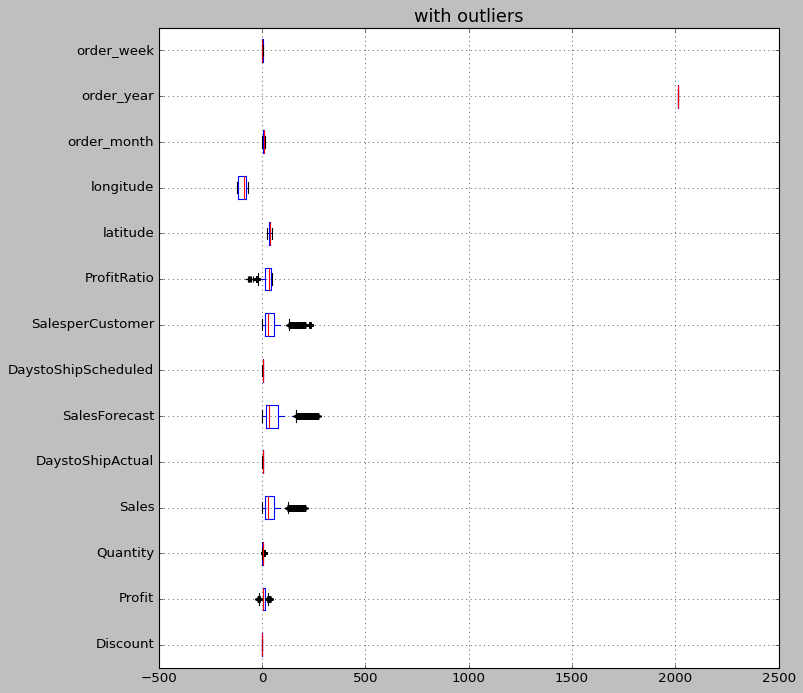

In [ ]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('with outliers',fontsize=16)
plt.show()

In [ ]:
sales_by_month = df.groupby('order_month')['Sales'].sum().reset_index()
fig = px.line(sales_by_month,
              x='order_month',
              y='Sales',
              title='Sales by Month')
fig.show()

In [ ]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()

fig = px.pie(sales_by_category,
             values='Sales',  # Correct column name for Sales
             names='Category',  # Correct column name for Category, no extra space
             hole=0.3,
             color_discrete_sequence=px.colors.qualitative.Pastel)  # Use px.colors for color

fig.update_traces(textposition='inside', textinfo='percent+label')  # Fixed textposition typo
fig.update_layout(title_text='Sales by Category', title_font_size=24)

fig.show()  # Add parentheses to show the figure


In [ ]:
sales_by_sub_category = df.groupby('Sub_Category')['Sales'].sum().reset_index()

fig = px.bar(sales_by_sub_category,
             x='Sub_Category',
             y='Sales',
             color='Sub_Category',
              pattern_shape='Sub_Category', pattern_shape_sequence=[".", "x", "+"],
             title='Sales by Sub-Category')

fig.show()

In [ ]:
df.head()

,OrderDate,Category,Discount,OrderID,Profit,Quantity,Region,Sales,Segment,ShipDate,...,SalesForecast,ShipStatus,DaystoShipScheduled,SalesperCustomer,ProfitRatio,latitude,longitude,order_month,order_year,order_week
0,2011-01-04 00:00:00+00:00,Office Supplies,0.2,CA-2011-103800,6,2,Central,16,Consumer,2011-01-08 00:00:00+00:00,...,22,Shipped Early,6,16.450000,33.8,29.8941,-95.6481,1,2011,1
1,2011-01-05 00:00:00+00:00,Office Supplies,0.2,CA-2011-112326,4,3,Central,12,Home Office,2011-01-09 00:00:00+00:00,...,15,Shipped Early,6,11.780000,36.3,41.7662,-88.1410,1,2011,2
4,2011-01-06 00:00:00+00:00,Office Supplies,0.2,CA-2011-141817,5,3,East,20,Consumer,2011-01-13 00:00:00+00:00,...,26,Shipped Late,6,19.540000,25.0,39.9448,-75.2288,1,2011,3
6,2011-01-07 00:00:00+00:00,Office Supplies,0.0,CA-2011-106054,5,3,South,13,Corporate,2011-01-08 00:00:00+00:00,...,17,Shipped On Time,1,0.000000,41.0,33.9321,-83.3525,1,2011,4
7,2011-01-07 00:00:00+00:00,Office Supplies,0.0,CA-2011-167199,0,4,South,31,Home Office,2011-01-11 00:00:00+00:00,...,41,Shipped Early,6,230.616544,1.0,37.8274,-87.5632,1,2011,4


In [ ]:
sales_profit_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

In [ ]:
color_palatte = colors.qualitative.Pastel

fig = go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'],
                     y=sales_profit_by_segment['Sales'],
                     name='Sales',
                     marker_color=color_palatte[0]))
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'],
                     y=sales_profit_by_segment['Profit'],
                     name='Profit',
                     marker_color=color_palatte[1]))
fig.update_layout(title='Sales and Profit analysis by customer segment',
                  xaxis_title= 'customer segment', yaxis_title='Amount')

fig.show()

In [ ]:
sales_profit_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['sales_profit_ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment', 'sales_profit_ratio']])

       Segment  sales_profit_ratio
0     Consumer            4.604218
1    Corporate            4.535370
2  Home Office            4.265990


In [ ]:
from google.colab import files
df.to_csv('df.csv', index=False)
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>